<a href="https://colab.research.google.com/github/anjali2126/PRODIGY_ML_01/blob/main/notebook2198e721c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
amitgour03_house_prices_from_lowa_path = kagglehub.dataset_download('amitgour03/house-prices-from-lowa')

print('Data source import complete.')


100%|██████████| 179k/179k [00:00<00:00, 26.0MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [6]:
#selecting Feature
feature = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']
X = train_data[feature]
y = train_data['SalePrice']

# Spiting the train data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_val)                           #Y prediction
mean_abs_err = mean_absolute_error(y_val, y_pred)       #Mean Absolute Error
mean_sq_err = mean_squared_error(y_val, y_pred)         #Mean Square Error
r2_scr = r2_score(y_val, y_pred)                        #r2 Score

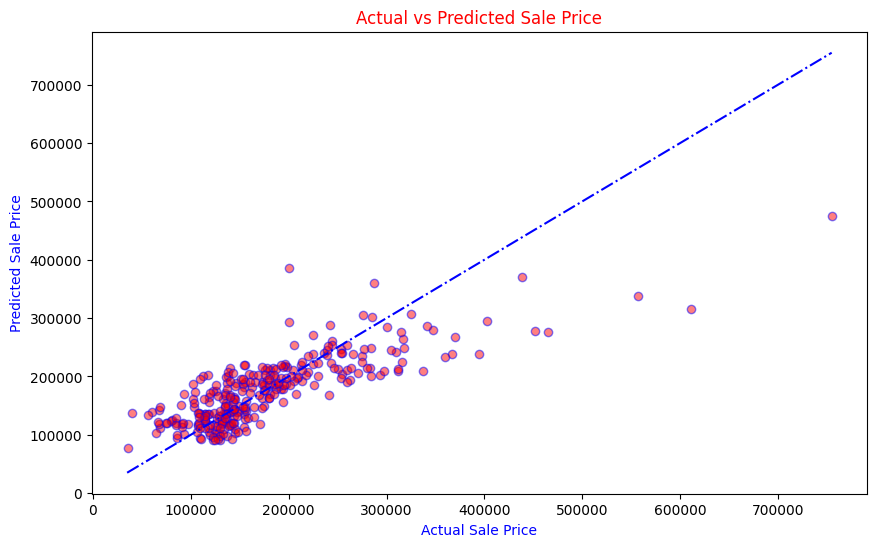

In [8]:
plt.figure(figsize=(10, 6))                             #Ploting Actual vs Predicted Sales Price
plt.scatter(y_val, y_pred, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Actual Sale Price', color='blue')
plt.ylabel('Predicted Sale Price', color='blue')
plt.title('Actual vs Predicted Sale Price', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b-.')
plt.show()

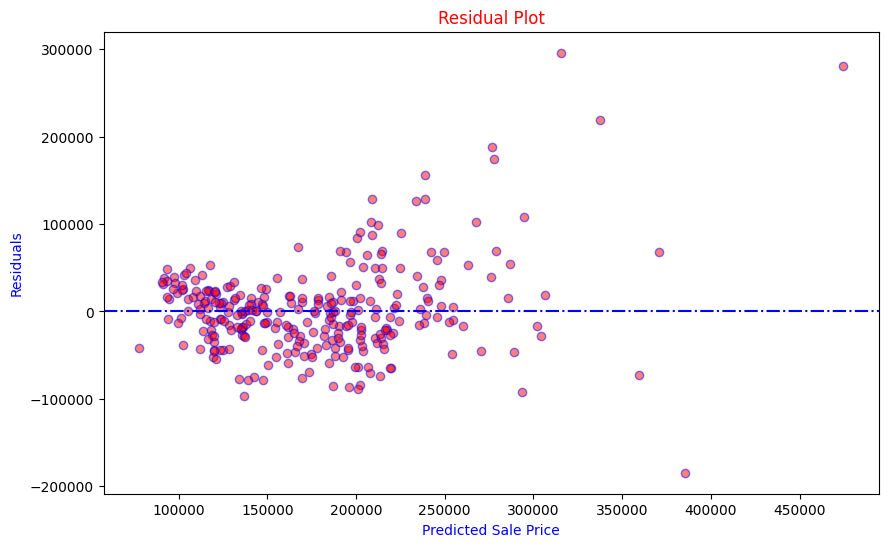

In [9]:
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Predicted Sale Price', color='blue')
plt.ylabel('Residuals', color='blue')
plt.title('Residual Plot', color='red')
plt.axhline(y=0, color='b', linestyle='-.')
plt.show()

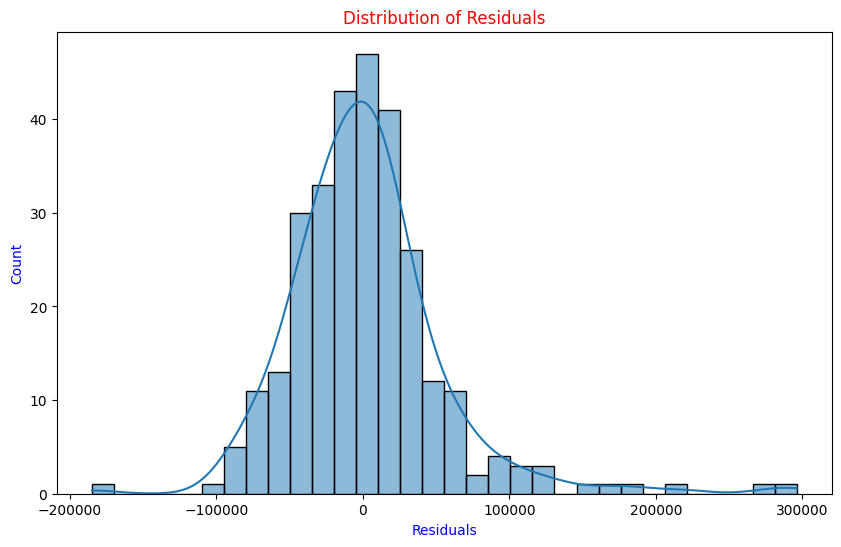

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals', color='b')
plt.ylabel('Count', color='b')
plt.title('Distribution of Residuals', color='r')
plt.show()

<Figure size 1200x800 with 0 Axes>

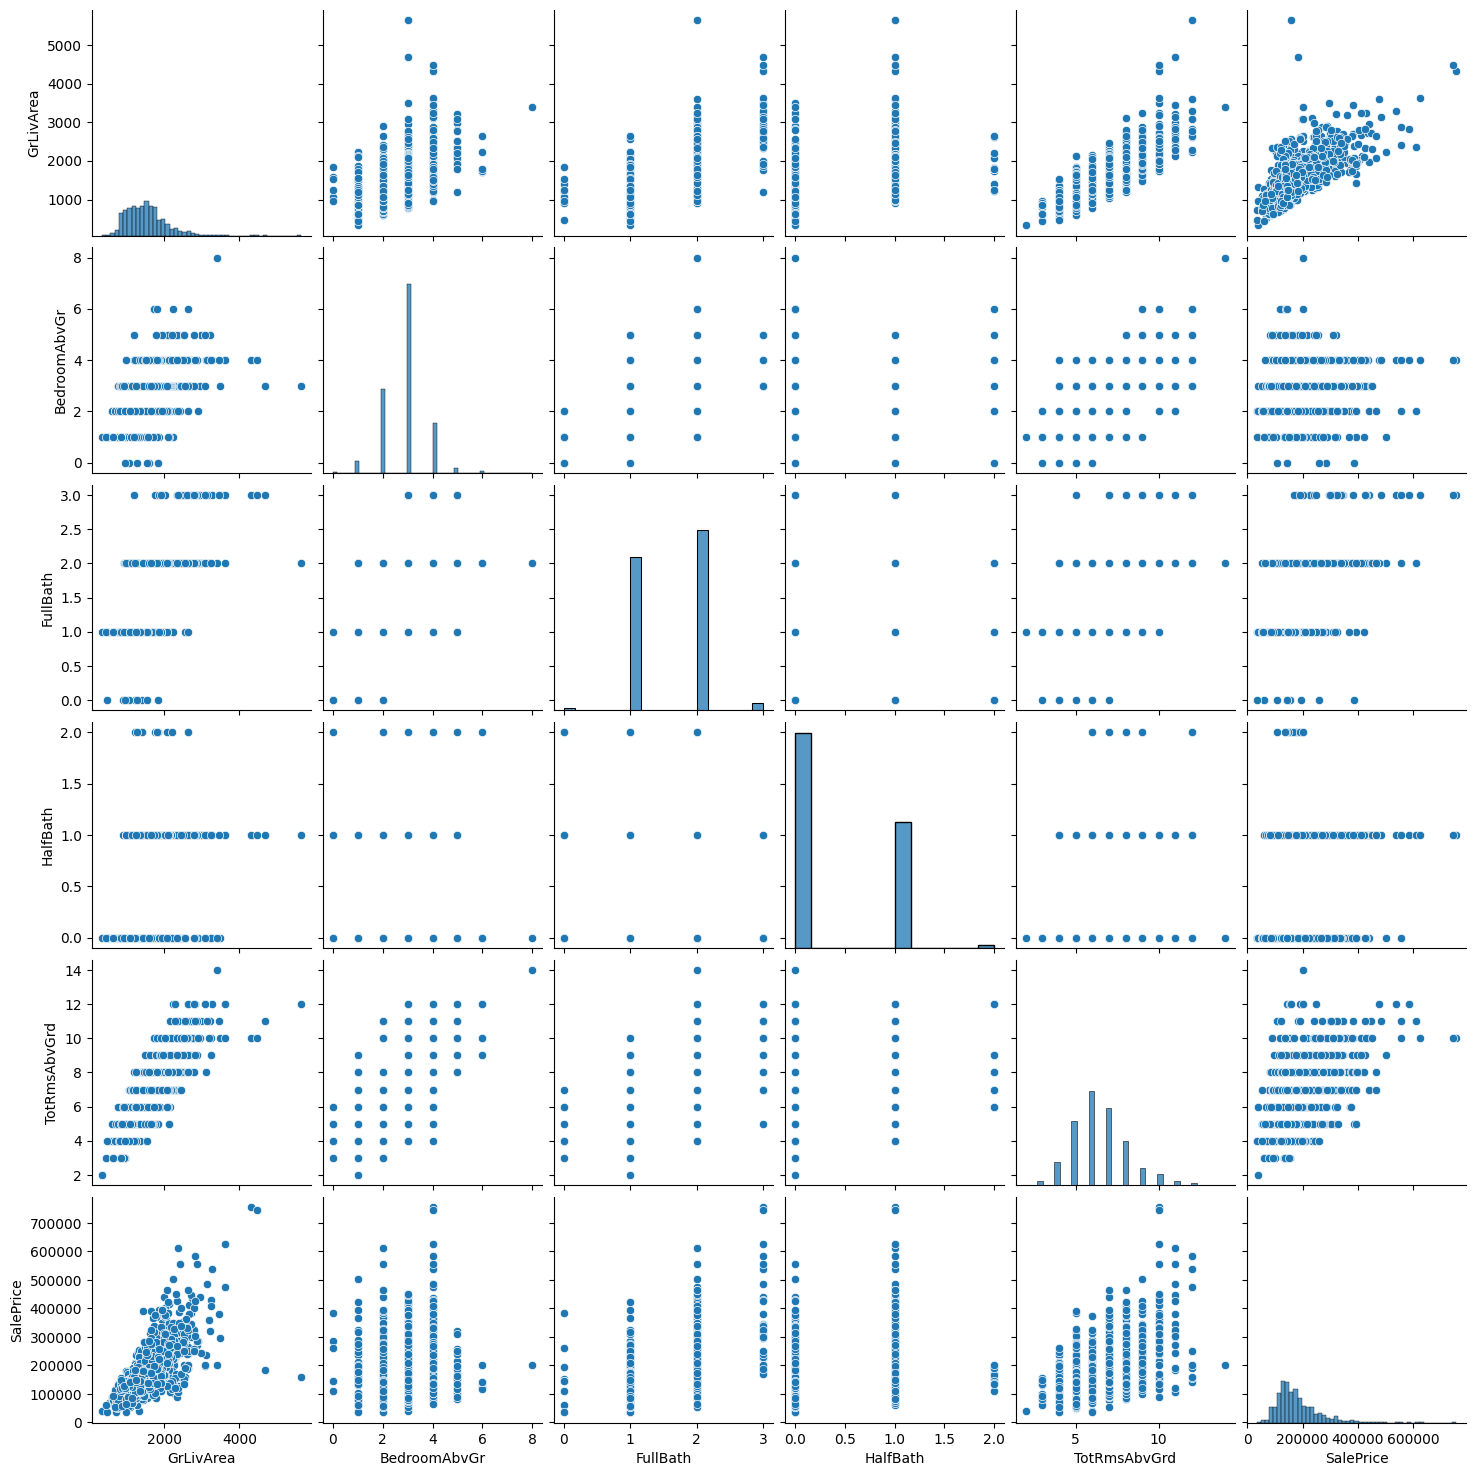

In [11]:
plt.figure(figsize=(12, 8))
sns.pairplot(train_data[feature + ['SalePrice']])
plt.show()

In [13]:
ex_data = {'GrLivArea':[1000],'BedroomAbvGr':[4],'FullBath':[1],'HalfBath':[2],'TotRmsAbvGrd':[4]}
example = pd.DataFrame(ex_data)
example_prediction = model.predict(example)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

X_test = test_data[feature]
test_predictions = model.predict(X_test)

pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
pred.to_csv('Predictions.csv', index=False)

Example Prediction: $81,727.32
